In [3]:
import cv2
import matplotlib.pyplot as plt

### 2D image histogram - similarity comparision
cv2.compareHist(hist1, hist2, compare_method)
* 1. Correlation (HISTCMP_CORREL)  :  $d(H1,H2)=\frac{∑_I(H_1(I)−\bar H_1)(H_2(I)−\bar H_2)}{\sqrt{∑I(H_1(I)−\bar H_1)^2∑I(H_2(I)−\bar H_2)^2}}$
* 2. Chi-Square (HISTCMP_CHISQR) : $d(H_1,H_2)=∑\limits_{I}\frac{(H_1(I)−H_2(I))^2}{H_1(I)}$
* 3. Intersection (HISTCMP_INTERSECT) : $d(H_1,H_2)=∑\limits_ I min(H_1(I),H_2(I))$
* 4. Bhattacharyya distance (HISTCMP_BHATTACHARYYA) : $d(H_1,H_2)=\sqrt {1− \frac{1}{\sqrt {H_1 H_2 N^2}} ∑\limits_{I} \sqrt{H_1(I)⋅H_2(I)}}$

In [4]:
def compareHistogram(hist1, hist2):
    compare_1 = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_CORREL)   ## 1에 가까울수록 유사 (1: 완전 일치, -1: 완전 불일치, 0: 무관계)
    compare_2 = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_CHISQR)   ## 0에 가까울수록 유사 (0: 완전 일치, 무한대: 완전 불일치)
    compare_3 = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_INTERSECT)  ## 값이 클수록 유사 (1: 완전 일치, 0: 완전 불일치 )
    compare_4 = cv2.compareHist(hist1, hist2, method=cv2.HISTCMP_BHATTACHARYYA) ## 값이 작을수록 유사
    return compare_1, compare_2, compare_3, compare_4

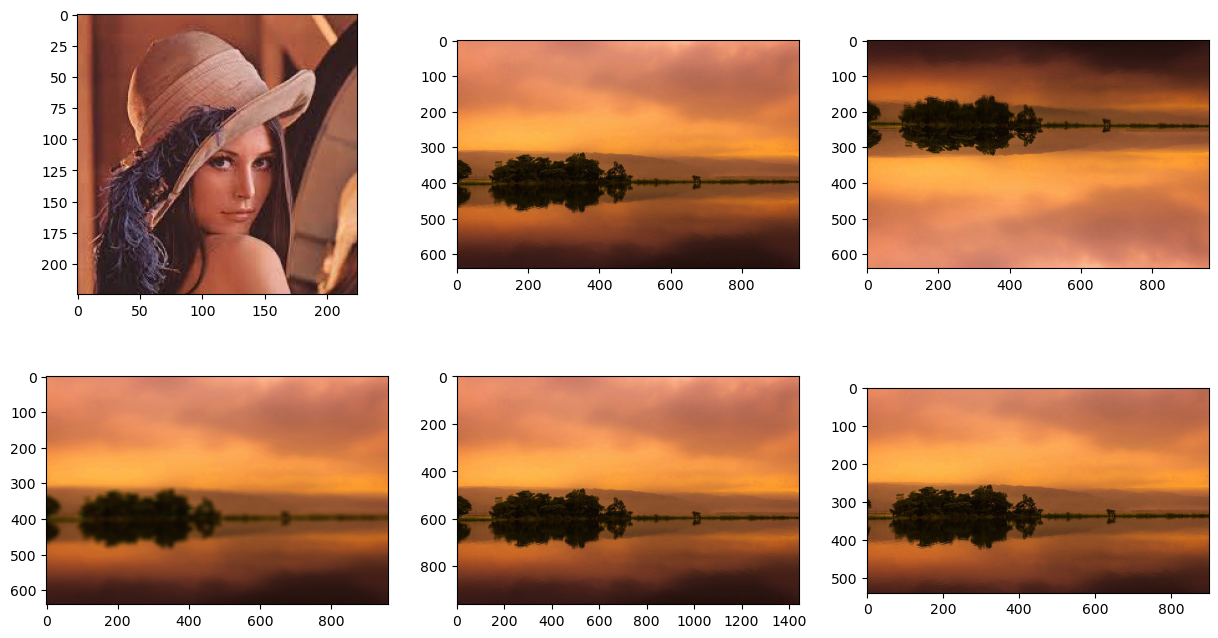

hist_1 and hist_2 : (0.3729209205788336, 1134.9513145864066, 42.9127967270324, 0.7618651920419144)
hist_1 and hist_3 : (0.3729209205788336, 1134.9513145864066, 42.9127967270324, 0.7618651920419144)
hist_1 and hist_4 : (0.3752343568581954, 928.7773673849221, 37.58563628309639, 0.7897014305216424)
hist_1 and hist_5 : (0.38237482992536187, 1783.279660408223, 49.267083615181036, 0.757028077868627)
hist_1 and hist_6 : (0.23854784886276137, 1836.3278810636268, 30.558827915258007, 0.8190137544404253)


In [8]:
img_1 = cv2.imread('./data/images/lena.jpg')
img_2 = cv2.imread('./data/images/nature_brown.jpg')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2HSV)

img_3 = cv2.flip(img_2, 0)  ## flip
img_4 = cv2.GaussianBlur(img_2, (15,15), 64)   ## blurring
img_5 = cv2.resize(img_2, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)  ## image size 늘림 - interpolation
img_6 = img_2[60:600, 30:930]  ## image size 줄임 - crop 

hist_1 = cv2.calcHist([img_1], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_1, hist_1, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_2 = cv2.calcHist([img_2], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_2, hist_2, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_3 = cv2.calcHist([img_3], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_3, hist_3, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_4 = cv2.calcHist([img_4], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_4, hist_4, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_5 = cv2.calcHist([img_5], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_5, hist_5, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_6 = cv2.calcHist([img_6], [0,1], None, [180, 256], [0,180, 0,256])
cv2.normalize(hist_6, hist_6, 0, 1, norm_type=cv2.NORM_MINMAX)

j = 2
i = 3
plt.figure(figsize=(15,8))
plt.subplot(j,i,1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_HSV2RGB))
plt.subplot(j,i,2)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_HSV2RGB))
plt.subplot(j,i,3)
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_HSV2RGB))
plt.subplot(j,i,4)
plt.imshow(cv2.cvtColor(img_4, cv2.COLOR_HSV2RGB))
plt.subplot(j,i,5)
plt.imshow(cv2.cvtColor(img_5, cv2.COLOR_HSV2RGB))
plt.subplot(j,i,6)
plt.imshow(cv2.cvtColor(img_6, cv2.COLOR_HSV2RGB))
plt.show()

print(f"hist_1 and hist_2 : {compareHistogram(hist_1, hist_2)}")
print(f"hist_1 and hist_3 : {compareHistogram(hist_1, hist_3)}")
print(f"hist_1 and hist_4 : {compareHistogram(hist_1, hist_4)}")
print(f"hist_1 and hist_5 : {compareHistogram(hist_1, hist_5)}")
print(f"hist_1 and hist_6 : {compareHistogram(hist_1, hist_6)}")

1. histogram은 spatial 정보 변화의 영향을 받지 않음
    - img_2(base)와 img_3(flip)는 img_1에 대한 유사도가 같음
2. histogram은 pixel value 정보 변화의 영향을 받음
    - img_4(GaussianBlur - value 정보가 변형)
    - img_5(image size 늘림 - value 정보가 늘어남)
    - img_6(image size 줄임 - value 정보가 사라짐)
    - img_4 ~ img_6는 img_2 ~ img_3과 img_1에 대한 유사도가 다름

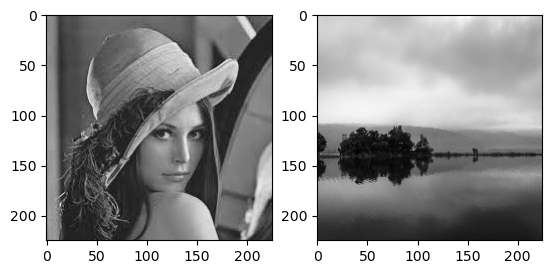

(0.3784253644268326, 295.6947868893302, 33.87443643005099, 0.3314768065168861)


In [9]:
img_1 = cv2.imread('./data/images/lena.jpg')
img_2 = cv2.imread('./data/images/nature_brown.jpg')
img_2 = cv2.resize(img_2, (225,225))

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

hist_1 = cv2.calcHist([img_1], [0], None, [256], [0,180])
cv2.normalize(hist_1, hist_1, 0, 1, norm_type=cv2.NORM_MINMAX)

hist_2 = cv2.calcHist([img_2], [0], None, [256], [0,180])
cv2.normalize(hist_2, hist_2, 0, 1, norm_type=cv2.NORM_MINMAX);

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_2, cmap='gray')
plt.show()

print(compareHistogram(hist_1, hist_2))

1D(intensity)일때와 2D(Hue, Saturation)일 때의 similarity가 다름 (pixel value의 변화)